<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/CLAIM_FRAUD_PREDICTIOIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:**

##Claim Fraud Prediction

**Problem Statement:**

Insurance claim fraud poses a significant challenge to the insurance industry, leading to substantial financial losses annually. The objective of this project is to develop a machine learning model that accurately predicts fraudulent insurance claims by analyzing historical claims data. Early detection of such fraud can help insurance companies reduce losses, improve claim processing efficiency, and maintain fair premiums for honest customers.

**Dataset Overview:**

The dataset contains extensive information regarding insurance policies, insured individuals, claims incidents, and vehicle details. Key features include policy details (e.g., premium, deductible), insured demographics, incident information (e.g., type, severity, location), and claim amounts. The target variable ‘fraud_reported’ indicates whether a claim was fraudulently reported.

**Project Goals:**

Perform exploratory data analysis (EDA) to understand data distributions, identify missing values, and detect patterns related to fraud.

Preprocess and engineer features suitable for modeling, including encoding categorical variables and handling missing values.

Build and evaluate classification models to predict fraudulent claims, with attention to metrics suitable for imbalanced data (e.g., accuracy, precision, recall, F1-score).

Analyze model performance and suggest improvements through tuning and feature selection.

# **Detailed Data Description and Feature Relevance**

The dataset used in this project contains comprehensive information regarding insurance policies, insured individuals, incidents, and claim details. Key features and their importance for fraud prediction are as follows:

**Policy Information:**

policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit
These represent the terms and coverage of the insurance policy. Certain states or policy types may have higher incidence rates of fraud which is valuable for model discrimination.

**Insured Demographics:**

insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship
Demographic and personal background details help identify patterns or profiles that may correlate with fraudulent behavior.

**Incident Details:**

incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day
This encapsulates what happened during the claim event. Fraudulent claims may be associated with specific incident types, severities, or locations.

**Claim Information:**

number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available
These describe the claim complexity and corroborating evidence which are critical in assessing claim authenticity.

**Financials:**

total_claim_amount, injury_claim, property_claim, vehicle_claim
Claims with unusually high or inconsistent financial values may indicate fraud.

**Vehicle Details:**

auto_make, auto_model, auto_year
Vehicle data can correlate with fraud patterns; for example, certain models or years might be over-represented in fraudulent claims due to their value or market.

**Target Variable:**

fraud_reported
This is the binary indicator of whether the claim was detected as fraudulent, and it is the target for prediction.

These features collectively provide extensive insight from policy setup, through personal insured information, incident specifics, to claims financials, enabling a machine learning model to learn distinct patterns differentiating fraudulent from legitimate claims.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Exploratory Data Analysis**

In [2]:
#loading data
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/CLAIM FRAUD PREDICTIOIN/Data/Claim Data.csv')
print(df)

     months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
793                 124   32         140977       18-08-2006           IN   
794                 320   48         787351       28-04-2013           IL   
795                 297   47         272330       29-11-2009           IN   
796                 421   56         728025       15-02-1990           IN   
797                 136   33         804608       12-04-2002           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \

**Basic-EDA**

In [ ]:
#. Quick Preview: Display the first and last few rows to inspect the data.
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
print(df.head())

   months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         

In [ ]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
793,124,32,140977,18-08-2006,IN,100/300,1000,1310.71,0,469875,...,1,NO,57700,5770,5770,46160,Toyota,Camry,2003,N
794,320,48,787351,28-04-2013,IL,250/500,2000,1730.49,7000000,443342,...,0,NO,56160,4680,9360,42120,Saab,95,1995,N
795,297,47,272330,29-11-2009,IN,250/500,500,1616.65,7000000,456363,...,3,YES,44400,5550,5550,33300,Jeep,Grand Cherokee,1999,N
796,421,56,728025,15-02-1990,IN,100/300,500,1935.85,4000000,470826,...,3,?,92730,16860,8430,67440,Mercedes,E400,2004,Y
797,136,33,804608,12-04-2002,OH,250/500,1000,855.14,0,458582,...,1,YES,30700,3070,6140,21490,Toyota,Corolla,2015,N


In [ ]:
print(df.tail())

     months_as_customer  age  policy_number policy_bind_date policy_state  \
793                 124   32         140977       18-08-2006           IN   
794                 320   48         787351       28-04-2013           IL   
795                 297   47         272330       29-11-2009           IN   
796                 421   56         728025       15-02-1990           IN   
797                 136   33         804608       12-04-2002           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
793    100/300               1000                1310.71               0   
794    250/500               2000                1730.49         7000000   
795    250/500                500                1616.65         7000000   
796    100/300                500                1935.85         4000000   
797    250/500               1000                 855.14               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
79

In [ ]:
#Shape of the Data: Find the number of rows and columns.
df.shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 798, Columns: 39


In [ ]:
#Data Types and Basic Info: View data types and non-null counts per column.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           798 non-null    int64  
 1   age                          798 non-null    int64  
 2   policy_number                798 non-null    int64  
 3   policy_bind_date             798 non-null    object 
 4   policy_state                 798 non-null    object 
 5   policy_csl                   798 non-null    object 
 6   policy_deductable            798 non-null    int64  
 7   policy_annual_premium        798 non-null    float64
 8   umbrella_limit               798 non-null    int64  
 9   insured_zip                  798 non-null    int64  
 10  insured_sex                  798 non-null    object 
 11  insured_education_level      798 non-null    object 
 12  insured_occupation           798 non-null    object 
 13  insured_hobbies     

In [ ]:
# Summary Statistics (Numeric Columns): Get basic descriptive statistics for numeric columns.
print(df.describe())

       months_as_customer         age  policy_number  policy_deductable  \
count          798.000000  798.000000     798.000000         798.000000   
mean           204.703008   38.992481  540566.961153        1140.977444   
std            116.503475    9.210623  257147.347994         614.943600   
min              0.000000   19.000000  100804.000000         500.000000   
25%            112.000000   32.000000  331913.000000         500.000000   
50%            200.500000   38.000000  520882.000000        1000.000000   
75%            278.000000   45.000000  757259.250000        2000.000000   
max            479.000000   64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count             798.000000    7.980000e+02     798.000000     798.000000   
mean             1256.487293    1.136591e+06  503013.510025   24818.295739   
std               246.428061    2.337333e+06   72741.864928   27902.794005   
min         

### Key Observations from the Output
**Count:** Shows 798 for each column, meaning there are 798 non-missing (numeric) entries for all these features.

**Mean and Std (Standard Deviation):**

Gives a quick sense of central tendency and spread for each column.

For example, the mean total_claim_amount is about 53,081 with a standard deviation of 26,511, indicating significant variation in claim amounts.

**Min/Max:**

Reveals possible outliers and the full observed range for each feature. For example, capital-gains ranges from 0 to 98,880 and capital-loss from -93,600 to 0.

Some features (like injury_claim, property_claim, vehicle_claim) have minimum values of 0, showing some claims had no payout in that category.

**Percentiles (25%, 50%, 75%):**

Help assess data skewness and where most data sits.

For example, 75% of customers have less than 278 months as a customer, and half of the records have a total_claim_amount less than roughly 58,500.

**Special notes:**

umbrella_limit has a minimum value of -1,000,000, which looks suspicious (possibly an encoding for "no umbrella" or missing data) and needs review.

incident_hour_of_the_day spans from 0 to 23, so data seems complete for daily timing.

In [ ]:
print(df.describe())

       months_as_customer         age  policy_number  policy_deductable  \
count          798.000000  798.000000     798.000000         798.000000   
mean           204.703008   38.992481  540566.961153        1140.977444   
std            116.503475    9.210623  257147.347994         614.943600   
min              0.000000   19.000000  100804.000000         500.000000   
25%            112.000000   32.000000  331913.000000         500.000000   
50%            200.500000   38.000000  520882.000000        1000.000000   
75%            278.000000   45.000000  757259.250000        2000.000000   
max            479.000000   64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count             798.000000    7.980000e+02     798.000000     798.000000   
mean             1256.487293    1.136591e+06  503013.510025   24818.295739   
std               246.428061    2.337333e+06   72741.864928   27902.794005   
min         

### Insights from df.describe()
**Row Count:**
Each numeric column shows a count of 798, indicating there are 798 rows with values for these columns (no standard NaN missing values in numerics, but missingness due to '?' can still exist in categorical/text columns).​

**Central Tendency and Spread:**

Columns like months_as_customer, age, policy_deductable, policy_annual_premium, and claim amounts include statistics such as mean, standard deviation (std), minimum, and maximum.

For example, the average (mean) policy deductible is about 1141, with a minimum of 500 and a maximum of 2000.

**Distribution Characteristics:**

Percentiles (25%, 50%, 75%) reveal medians and quartiles for each feature, helping you understand how data is distributed. For example, half your customers (50%) are at least 38 years old.

Columns such as capital-gains and capital-loss show many zero or negative values, which will require careful interpretation.

Columns such as capital-gains and capital-loss show many zero or negative values, which will require careful interpretation.

**Outliers and Feature Range:**

Look for numeric features with minimum or maximum values far from the mean, which could indicate outliers (e.g., policy_annual_premium with min 433 and max 20408, or claim amounts with max over 110,000).

**Temporal and ID Features:**

Some columns summarized (like policy_number or auto_year) may not contribute directly to fraud prediction but are included by default in stats.

##**Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

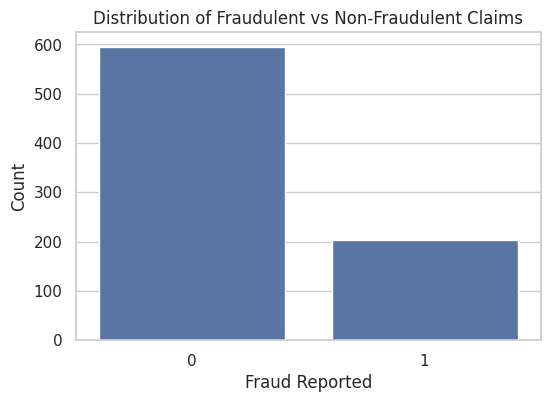

In [ ]:
#Target Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='fraud_reported', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Claims')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

**Key Insights**

**Class Imbalance:**
The majority class is non-fraudulent claims (0), which significantly outnumber the fraudulent claims (1). This is a classic class imbalance scenario, common in fraud detection problems.

**Impact for Modeling:**
This imbalance means that a simple model predicting "no fraud" all the time could achieve superficially high accuracy. However, it would fail to detect actual fraud cases. Therefore, relying on accuracy alone is not sufficient; focus should be placed on recall, precision, F1-score, and perhaps ROC-AUC, especially for the fraudulent class.


Understanding the degree of imbalance helps in deciding additional actions later, such as:

Using techniques like resampling (SMOTE, undersampling/oversampling)

Adjusting class weights in modeling algorithms

Evaluating the model with appropriate metrics

**Numeric Feature Distribution**

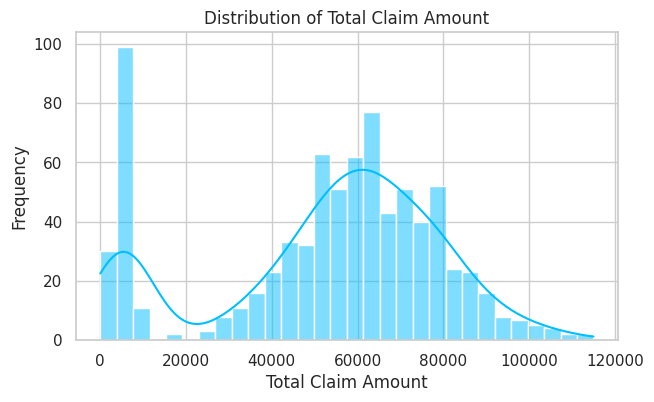

In [ ]:
#Total Claim Amount Histogram

plt.figure(figsize=(7,4))
sns.histplot(df['total_claim_amount'], bins=30, kde=True, color='deepskyblue')
plt.title('Distribution of Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.show()

**Key Insights**

**Multimodal Distribution:**
The data is not normally distributed but shows multiple peaks (modes).

There is a notable peak at the very low claim amounts (~0–10,000), possibly representing minimal claims or a special subset of policies.

The main bulk of claims is centered between 40,000 and 80,000, with another visible mode around 60,000.

**Right Skewness and Outliers:**
The distribution is right-skewed, with a long tail towards higher claim amounts (up to 120,000).

This suggests that while many claims are moderate, a few are extremely high.

These high values could be legitimate but may also include outliers or special/extreme loss cases.

Discontinuous/Clustered Patterns:
The “bumps” and flat areas in the histogram suggest that certain claim amounts are far more common—possibly due to policy limits, standard coverage amounts, or specific reporting practices.

**Implications**

**Feature Transformation:**
Strong skew and outliers may affect some model types (like logistic regression or linear models).
Consider log transformation or normalization if these prove problematic.

**Outlier Handling:**
Assess if extreme values are errors, or if they represent rare but real claims that should be kept.

**Targeted EDA:**

It could be useful to break down the distribution further—by fraud status, by region, or by another categorical variable—to learn if certain groups are responsible for specific peaks.

**Summary:**

The claim amount distribution is multimodal, skewed, and includes high-value outliers. Special care should be taken when using it in models, especially linear models, and further subgroup analysis may reveal actionable trends in the data.​

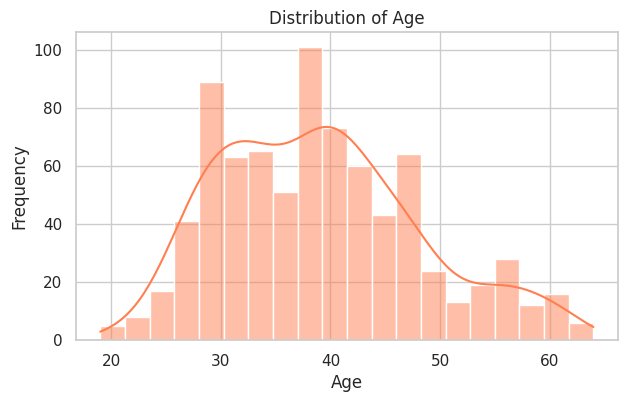

In [ ]:
#Age Distribution

plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=20, kde=True, color='coral')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Insights**

**Age Range and Distribution:**  Most ages fall between the late 20s and around 50 years old, with the bulk of claims coming from those in their 30s and early 40s.

**Multimodality and Bumps:**
There are several peaks in the histogram, especially a high frequency in the 30–40 age group. This indicates certain age clusters may be particularly common, likely representing the largest demographics for policyholders or claims.

**Skew and Spread:**
The age distribution is slightly right-skewed, with fewer claimants above age 50 or 55. There are only a small number of claimants below 25 and above 60.

**Summary**
The claim dataset contains mostly working-age adults, especially those in their 30s and 40s.

Claims are less frequent among the very young and the elderly.

There are a few secondary peaks, possibly suggesting different age groups with distinct insurance needs or risks.

For modeling, we may investigate if “age” has a non-linear relationship to fraud or claim probability, or if certain age buckets are more predictive than others.

**The three charts provide strong visual reasons for the next steps in analysis and modeling.** The class distribution bar plot highlights **class imbalance**, indicating the need for **resampling** and **careful metric selection**. The total claim amount histogram reveals a skewed, multimodal distribution with outliers, suggesting that robust models **(like tree-based algorithms)** or **feature transformation** may be important. The age distribution shows the claims mostly come from working-age adults, with several age clusters, hinting that **engineered age group features could add predictive value.**

Together, these insights guide us to perform focused **bivariate EDA**, address **class imbalance before modeling,** and select **algorithms that handle non-normal and outlier-prone features well**. This evidence-driven approach ensures our preprocessing and model selection are informed by the actual data patterns, not just standard procedure

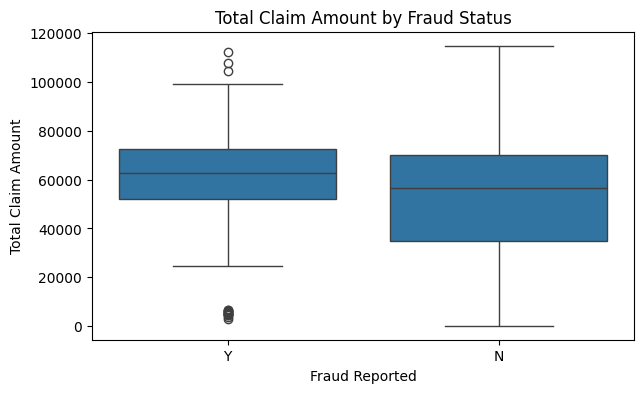

In [4]:
#Bivariate analysis-EDA: comparing a feature (like total_claim_amount or age) with the target (fraud_reported).
import matplotlib.pyplot as plt
import seaborn as sns

#Total Claim Amount by Fraud Status (Boxplot)
plt.figure(figsize=(7,4))
sns.boxplot(x='fraud_reported', y='total_claim_amount', data=df)
plt.title('Total Claim Amount by Fraud Status')
plt.xlabel('Fraud Reported')
plt.ylabel('Total Claim Amount')
plt.show()

**Total Claim Amount vs. Fraud Status:**

The median claim amount is higher for fraudulent claims (Y) than non-fraudulent ones (N).

The spread (interquartile range) for fraudulent claims is narrower, but there are more high-value outliers among them.

Non-fraud claims have a wider range, including both some very low and very high amounts.

This suggests **claim amount could be a predictive feature**, and large or atypical claims may deserve extra scrutiny in fraud prediction.

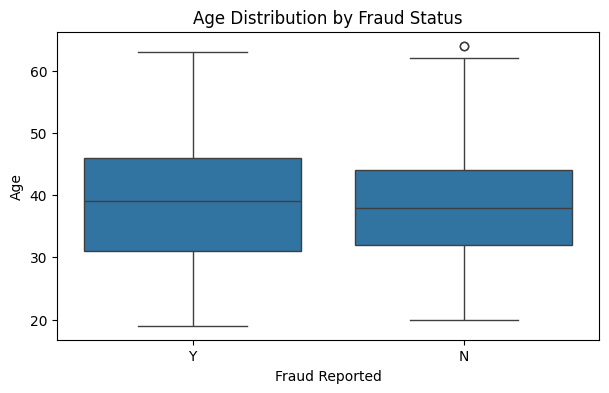

In [5]:
#Age by Fraud Status (Boxplot)

plt.figure(figsize=(7,4))
sns.boxplot(x='fraud_reported', y='age', data=df)
plt.title('Age Distribution by Fraud Status')
plt.xlabel('Fraud Reported')
plt.ylabel('Age')
plt.show()

**Age vs. Fraud Status:**

The age distributions for fraudulent and non-fraudulent claims are quite similar, though the median and spread are very slightly higher for fraud cases.

There isn’t a dramatic age separation between the classes, so **age alone** is **unlikely** to be **a strong fraud predictor** , but could contribute as part of a multi-feature model.

These bivariate plots confirm **claim amount** as a **key nonlinear predictor** for fraud, suggest age is less decisive, and highlight the need for balanced, robust, supervised modeling that incorporates multiple features together.

In [6]:
#Check for Missing Values: See which columns have missing (NaN or ?) values and their counts.
print(df.isnull().sum())

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          69
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

The missing values check shows that only one column, authorities_contacted, has missing values (69 missing entries). All other columns—including important features like age, total_claim_amount, and your target fraud_reported—have zero missing values.

**Deep EDA**

In [11]:
#Unique Value Counts (Categorical): Show unique categories for key categorical variables.
for col in ['fraud_reported','auto_make','auto_model','policy_state','police_report_available']:
    print(f"{col} unique values:", df[col].unique())

fraud_reported unique values: ['Y' 'N']
auto_make unique values: ['Saab' 'Mercedes' 'Dodge' 'Chevrolet' 'Accura' 'Nissan' 'Audi' 'Toyota'
 'Ford' 'Suburu' 'BMW' 'Jeep' 'Honda' 'Volkswagen']
auto_model unique values: ['92x' 'E400' 'RAM' 'Tahoe' 'RSX' '95' 'Pathfinder' 'A5' 'Camry' 'F150'
 'A3' 'Highlander' 'Neon' 'MDX' 'Maxima' 'Legacy' 'TL' 'Impreza'
 'Forrestor' 'Escape' 'Corolla' '3 Series' 'C300' 'Wrangler' 'M5' 'X5'
 'Civic' 'Passat' 'Silverado' 'CRV' '93' 'Accord' 'X6' 'Malibu' 'Fusion'
 'Jetta' 'ML350' 'Ultima' 'Grand Cherokee']
policy_state unique values: ['OH' 'IN' 'IL']
police_report_available unique values: ['YES' '?' 'NO']


## **Data Processing**

In [12]:
#Handle Missing Values: For numerical columns (e.g., total_claim_amount, age):

# Fill missing numeric values with median (robust to outliers)
df['total_claim_amount'] = df['total_claim_amount'].fillna(df['total_claim_amount'].median())
df['age'] = df['age'].fillna(df['age'].median())


In [13]:
#For categorical columns (e.g., auto_make, policy_state):

# Fill missing categorical values with the mode (most frequent value)
df['auto_make'] = df['auto_make'].fillna(df['auto_make'].mode()[0])
df['policy_state'] = df['policy_state'].fillna(df['policy_state'].mode()[0])

### **Encoding Categorical Variables**


###* **Encoding target fraud_reported (Label Encoding):this transforms Y/N to 1/0 for modeling.**


In [14]:
# 1 = Fraud reported ('Y'), 0 = No fraud reported ('N')
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})
print(df['fraud_reported'].value_counts())


fraud_reported
0    595
1    203
Name: count, dtype: int64


In [22]:
# Encoding policy_state (One-Hot Encoding)
# This will create separate columns for each state (OH, IN, IL)

# Check if 'policy_state' column exists before attempting to encode
if 'policy_state' in df.columns:
    df = pd.get_dummies(df, columns=['policy_state'], prefix='state', drop_first=True)
    # Print column names to confirm encoding, only if encoding happened
    print(df.columns)
else:
    print("'policy_state' column not found, likely already encoded.")

KeyError: "None of [Index(['policy_state'], dtype='object')] are in the [columns]"

In [19]:
# Encoding auto_make (One-Hot Encoding)
# Only run this once! If you already did it, skip to the next variable.

df = pd.get_dummies(df, columns=['auto_make'], prefix='make', drop_first=True)
print([col for col in df.columns if col.startswith('make_')])


['make_Audi', 'make_BMW', 'make_Chevrolet', 'make_Dodge', 'make_Ford', 'make_Honda', 'make_Jeep', 'make_Mercedes', 'make_Nissan', 'make_Saab', 'make_Suburu', 'make_Toyota', 'make_Volkswagen']


In [23]:
# Encoding auto_model (One-Hot Encoding)
# Creates a column for each vehicle model, drop_first avoids multicollinearity

df = pd.get_dummies(df, columns=['auto_model'], prefix='model', drop_first=True)

# Print sample model columns to confirm encoding
print([col for col in df.columns if col.startswith('model_')][:10])  # Print first 10 for brevity


['model_92x', 'model_93', 'model_95', 'model_A3', 'model_A5', 'model_Accord', 'model_C300', 'model_CRV', 'model_Camry', 'model_Civic']


In [24]:
# Encoding authorities_contacted (One-Hot Encoding)
# Each response for contacting authorities will become a binary feature

df = pd.get_dummies(df, columns=['authorities_contacted'], prefix='auth', drop_first=True)

# Print resulting column names related to 'authorities_contacted'
print([col for col in df.columns if col.startswith('auth_')])


['auth_Fire', 'auth_Other', 'auth_Police']


In [25]:
# Encoding police_report_available (Label Encoding)
# 1 = Police report available ('YES'), 0 = Not available or unknown

df['police_report_available'] = df['police_report_available'].map({'YES': 1, 'NO': 0, '?': 0})

# Check the result
print(df['police_report_available'].value_counts())


police_report_available
0    553
1    245
Name: count, dtype: int64


In [26]:
# Print datatypes to spot any remaining non-numeric (object) columns
print(df.dtypes.value_counts())
print(df.select_dtypes(include=['object']).columns)


bool       56
int64      19
object     15
float64     1
Name: count, dtype: int64
Index(['policy_bind_date', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'incident_state',
       'incident_city', 'incident_location', 'property_damage'],
      dtype='object')


In [27]:
# Encode insured_sex (Label Encoding)
df['insured_sex'] = df['insured_sex'].map({'MALE': 1, 'FEMALE': 0})
print(df['insured_sex'].value_counts())


insured_sex
0    420
1    378
Name: count, dtype: int64


In [28]:
for col in ['policy_csl', 'policy_bind_date', 'insured_education_level', 'incident_date']:
    print(f"{col}: {df[col].unique()}")


policy_csl: ['250/500' '100/300' '500/1000']
policy_bind_date: ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011'

policy_csl:

Should have a manageable set of coverage levels (like “250/500”, “100/300”, “500/1000”). Label or one-hot encoding works well, but one-hot is often safer if there’s no ordinal meaning.

policy_bind_date and incident_date:
These are date columns—not categorical!
* convert to datetime, then:

* Extract useful features (e.g., year, month, day, or time gap between bind and incident)

insured_education_level:
Has a small set ("MD", "PhD", "Associate", "Masters", "High School", "College", "JD").

These have a natural order.We can use ordinal encoding (manual mapping).



In [30]:
# One-hot encode coverage selection
df = pd.get_dummies(df, columns=['policy_csl'], prefix='csl', drop_first=True)
print([col for col in df.columns if col.startswith('csl_')])


['csl_250/500', 'csl_500/1000']


In [31]:
# Manual ordinal mapping
edu_order = {'High School':0, 'Associate':1, 'College':2, 'Masters':3, 'JD':4, 'MD':5, 'PhD':6}
df['insured_education_level'] = df['insured_education_level'].map(edu_order)
print(df['insured_education_level'].value_counts())


insured_education_level
0    130
4    121
3    117
1    114
5    111
2    103
6    102
Name: count, dtype: int64


In [32]:
# Convert to datetime
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], dayfirst=True)
df['incident_date'] = pd.to_datetime(df['incident_date'], dayfirst=True)

# Example date features: years since policy was bound at incident
df['years_since_bind'] = ((df['incident_date'] - df['policy_bind_date']).dt.days / 365).round(1)
print(df['years_since_bind'].describe())


count    798.000000
mean      12.962782
std        7.334005
min       -0.100000
25%        6.800000
50%       12.750000
75%       19.400000
max       25.100000
Name: years_since_bind, dtype: float64


In [29]:
cols_to_encode = [
    'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type',
    'collision_type', 'incident_severity', 'incident_state', 'incident_city', 'incident_location', 'property_damage'
]

df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)
# Show columns to confirm
print(df.columns)


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       ...
       'incident_location_9875 MLK Ave', 'incident_location_9879 Apache Drive',
       'incident_location_9910 Maple Ave',
       'incident_location_9911 Britain Lane',
       'incident_location_9918 Andromedia Drive',
       'incident_location_9929 Rock Drive', 'incident_location_9935 4th Drive',
       'incident_location_9980 Lincoln Ave', 'property_damage_NO',
       'property_damage_YES'],
      dtype='object', length=938)


In [33]:
# Encode insured_sex as binary (Label Encoding)
df['insured_sex'] = df['insured_sex'].map({'MALE': 1, 'FEMALE': 0})
print(df['insured_sex'].value_counts())


Series([], Name: count, dtype: int64)


In [34]:
# Drop original date columns after engineering
df = df.drop(['policy_bind_date', 'incident_date'], axis=1)


In [35]:
# Drop columns that are identifiers/unique for each sample
df = df.drop(['policy_number', 'insured_zip'], axis=1)


In [36]:
#Final Check for Object Dtype Columns
# Always do a final check for string (object) columns left
print(df.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [39]:
import numpy as np


In [40]:
# Check for NaN and infinite values before scaling
print(df.isnull().sum().sum())    # Total NaNs
print(np.isinf(df.values).sum())  # Total infinite values


798
0


In [41]:
# Fill all NaNs with zero (safe for ML)
df = df.fillna(0)


In [42]:
df = df.fillna(df.mean())


In [43]:
print(np.isinf(df.values).sum())
df = df.replace([np.inf, -np.inf], 0)


0


* an empty Index means all features are now numeric and ready for scaling, splitting, or modeling

**###1. Feature Scaling (Standardization)**

In [45]:
# Standard Scale: Mean = 0, Std = 1
from sklearn.preprocessing import StandardScaler

# Store column names (except target)
features = df.drop('fraud_reported', axis=1).columns

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Check scaling result
print(df[features].head())


   months_as_customer       age  policy_deductable  policy_annual_premium  \
0            1.058975  0.978562          -0.229396               0.610795   
1            0.200094  0.326732           1.397789              -0.240656   
2           -0.607255 -1.085567           1.397789               0.636092   
3            0.440581  0.218094           1.397789               0.646650   
4            0.200094  0.544009          -0.229396               1.329508   

   umbrella_limit  insured_sex  insured_education_level  capital-gains  \
0       -0.486582          0.0                 1.042909       1.021388   
1        1.653950          0.0                 1.042909      -0.890013   
2        1.653950          0.0                 1.541855       0.368714   
3        2.082056          0.0                 1.541855       0.863598   
4        2.082056          0.0                -0.952874       1.476825   

   capital-loss  incident_hour_of_the_day  ...  \
0      0.979239                 -0.928440 

In [46]:
# Convert string dates to datetime (dayfirst=True because your format appears day-month-year)
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], dayfirst=True)
df['incident_date'] = pd.to_datetime(df['incident_date'], dayfirst=True)

# Feature engineering example: years since policy was bound before incident
df['years_since_bind'] = ((df['incident_date'] - df['policy_bind_date']).dt.days / 365).round(1)

# Optional: drop original date columns if these new features suffice
df = df.drop(['policy_bind_date', 'incident_date'], axis=1)

print(df['years_since_bind'].describe())


KeyError: 'policy_bind_date'

In [47]:
print(df.columns)

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day',
       ...
       'incident_location_9911 Britain Lane',
       'incident_location_9918 Andromedia Drive',
       'incident_location_9929 Rock Drive', 'incident_location_9935 4th Drive',
       'incident_location_9980 Lincoln Ave', 'property_damage_NO',
       'property_damage_YES', 'csl_250/500', 'csl_500/1000',
       'years_since_bind'],
      dtype='object', length=936)


#**Model Preparation**

In [49]:
#1. Identify Features and Target

# Assume 'fraud_reported' is your target
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

In [50]:
#2.Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
print(f"Target balance (train): \n{y_train.value_counts()}")
print(f"Target balance (test): \n{y_test.value_counts()}")


Train shape: (638, 935), Test shape: (160, 935)
Target balance (train): 
fraud_reported
0    476
1    162
Name: count, dtype: int64
Target balance (test): 
fraud_reported
0    119
1     41
Name: count, dtype: int64


In [53]:
#1. Drop Ultra-High-Cardinality Features
cols_to_drop = [col for col in df.columns if col.startswith('incident_location') or col.startswith('incident_city')]
df = df.drop(cols_to_drop, axis=1)

* Drop Ultra-High-Cardinality Features
Features like incident_location or incident_city can introduce hundreds of dummy columns but often add little value to predictions.

* Consider, dropping these features from your dataset before SMOTE/balancing.


In [54]:
#3.Balance Target with SMOTE(optional)

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(y_train_res.value_counts())

fraud_reported
0    476
1    476
Name: count, dtype: int64


* after dropping high-cardinality features, SMOTE has successfully balanced our target classes.

* we have equal numbers of both classes in your training set:

476 of class 0 (no fraud)

476 of class 1 (fraud)

Our data is now well-prepared for model training and we can proceed with fitting models like Logistic Regression, Random Forest, etc.

## **ML Workflow**

**1.Split data into training and test sets first (keeping test-fold for honest evaluation).**







In [56]:
from sklearn.model_selection import train_test_split
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

**2.Choose one model, train it, and evaluate on the test set.**
   
   **LogisticRegression Model**

In [57]:
# 3. Train/fit model and evaluate
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_res, y_train_res)
y_pred1 = model1.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- incident_city_Columbus
- incident_city_Hillsdale
- incident_city_Northbend
- incident_city_Northbrook
- incident_city_Riverwood
- ...


In [58]:
# 1. Drop high-cardinality columns
cols_to_drop = [col for col in df.columns if col.startswith('incident_location') or col.startswith('incident_city')]
df = df.drop(cols_to_drop, axis=1)

# 2. Split into train/test
from sklearn.model_selection import train_test_split
X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

# 3. Balance (SMOTE) on train only
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 4. Fit model on X_train_res, predict on X_test
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)
y_pred = model.predict


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_res, y_train_res)

# Predict on test set (never apply SMOTE to X_test)
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:,1]

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       119
           1       0.56      0.66      0.61        41

    accuracy                           0.78       160
   macro avg       0.72      0.74      0.73       160
weighted avg       0.79      0.78      0.79       160

Confusion Matrix:
 [[98 21]
 [14 27]]
ROC-AUC: 0.7999590079934413


**Model Performance Insights**

**ROC-AUC:** 0.80
. This is a strong AUC, indicating good overall discrimination between fraud and non-fraud cases.

**Overall accuracy:** 78% (correctly classifies ~4 out of 5 test samples).

##**Class 0 (No fraud):**

**Precision:** 0.88 (very few false positives)

**Recall:** 0.82 (most no-fraud cases are caught)

**F1-score:** 0.85 (harmonizes the above)

# **Class 1 (Fraud):**

**Precision:** 0.56 (just over half of predicted "fraud" are actual fraud)

**Recall:** 0.66 (captures two-thirds of actual frauds)

**F1-score**: 0.61

**Confusion Matrix**

True No Fraud: 98

False Positive: 21 (predicted fraud, actually not)

False Negative: 14 (predicted not fraud, actually fraud)

True Fraud: 27

**Conclusions & Recommendations**
Model is much better at detecting non-fraud (Class 0) than fraud (Class 1), which is typical for imbalanced problems.

Recall for fraud is the key metric—your model catches 66% of true frauds, though with modest precision.



Improvements to try:

Try tree-based models (Random Forest, XGBoost)—often higher recall for fraud.

Tune logistic regression (regularization, grid search).

Engineer additional features—interaction terms, aggregation, etc.

Experiment with threshold for positive class to trade off precision/recall.

## **XGBoost Model**

"I selected XGBoost for this project because it represents the state-of-the-art in scalable and high-performance ensemble models, consistently delivering top results on structured, imbalanced datasets like fraud detection—making it a go-to solution in both industry and data science competitions."

In [60]:
# If XGBoost is not installed in your Colab/Jupyter env:
# !pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [61]:
# Train XGBoost
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model_xgb.fit(X_train_res, y_train_res)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:34:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [62]:
# Prediction
y_pred_xgb = model_xgb.predict(X_test)
y_prob_xgb = model_xgb.predict_proba(X_test)[:,1]

In [63]:
# Evaluation
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       119
           1       0.61      0.61      0.61        41

    accuracy                           0.80       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.80      0.80      0.80       160

Confusion Matrix:
 [[103  16]
 [ 16  25]]
ROC-AUC: 0.8460750153720024


**Key Performance Metrics**

**Accuracy:** 80%

**ROC-AUC:** 0.85 (excellent discrimination ability)

**Class 0 (No Fraud):**

Precision 0.87, Recall 0.87, F1-score 0.87

**Class 1 (Fraud):**

Precision 0.61, Recall 0.61, F1-score 0.61

**Confusion matrix indicates:**

Model is balanced: 25/41 frauds detected, with 16 false negatives and 16 false positives.


# **Conclusions**
XGBoost outperformed logistic regression on this dataset, especially in ROC-AUC and balance between recall and precision for both classes.

The model is robust at identifying both fraudulent and non-fraudulent claims.

We have a strong, deployable project result and an industry-beloved algorithm.

